# SVM 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
data = pd.read_csv("FinalData.csv")

In [3]:
data

,Airtemp,Rel.Hum,Rainfall,Leaf_wetness_Hours,Radiation,Bacterial leaf spot,Alternariablight,Powdery mildew,Rhizopusrot,Downy mildew,Girdle beetle
0,25.7,76.0,0.0,0.42,3.000000,0,0,0,0,0,1
1,24.1,83.0,0.2,14.33,186.000000,1,0,0,1,0,0
2,24.5,83.0,0.6,11.33,196.000000,1,0,0,1,0,0
3,23.4,85.0,1.2,11.42,131.000000,0,0,0,1,0,0
4,25.0,78.0,0.0,8.50,259.000000,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3515,28.4,40.0,0.0,10.90,151.546572,0,0,0,0,0,0
3516,27.3,54.0,1.0,11.00,151.546572,0,0,0,1,0,0
3517,27.5,48.0,0.4,11.30,151.546572,0,0,0,1,0,0
3518,26.2,40.0,0.0,11.40,151.546572,0,0,0,0,0,0


In [7]:
# features = ['Airtemp', 'Rel.Hum', 'Rainfall', 'Leaf_wetness_Hours','Radiation','Alternariablight']
# class_colors = {0: 'blue', 1: 'red'}  
# sns.pairplot(data=data[features], hue='Alternariablight', palette=class_colors)


In [9]:

features = ['Airtemp', 'Rel.Hum', 'Rainfall', 'Leaf_wetness_Hours','Radiation']
# Splitting data into features (X) and target variable (y)
X = data[features]
y = data['Alternariablight']

In [10]:
X

,Airtemp,Rel.Hum,Rainfall,Leaf_wetness_Hours,Radiation
0,25.7,76.0,0.0,0.42,3.000000
1,24.1,83.0,0.2,14.33,186.000000
2,24.5,83.0,0.6,11.33,196.000000
3,23.4,85.0,1.2,11.42,131.000000
4,25.0,78.0,0.0,8.50,259.000000
...,...,...,...,...,...
3515,28.4,40.0,0.0,10.90,151.546572
3516,27.3,54.0,1.0,11.00,151.546572
3517,27.5,48.0,0.4,11.30,151.546572
3518,26.2,40.0,0.0,11.40,151.546572


In [17]:
# y

In [16]:
# data['Alternariablight'].value_counts()

In [18]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2816, 5)
X_test shape: (704, 5)
y_train shape: (2816,)
y_test shape: (704,)


In [21]:
data.columns

Index(['Airtemp', 'Rel.Hum', 'Rainfall', 'Leaf_wetness_Hours', 'Radiation',
       'Bacterial leaf spot', 'Alternariablight', 'Powdery mildew',
       'Rhizopusrot', 'Downy mildew', 'Girdle beetle'],
      dtype='object')

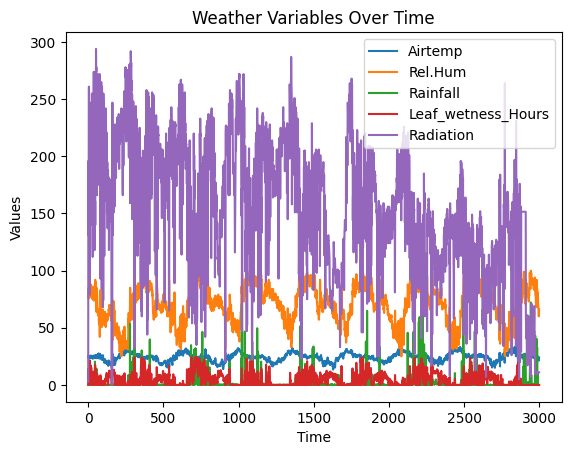

In [30]:

newData = data.head(3000)

plt.plot(newData['Airtemp'], label='Airtemp')
plt.plot(newData['Rel.Hum'], label='Rel.Hum')
plt.plot(newData['Rainfall'], label='Rainfall')
plt.plot(newData['Leaf_wetness_Hours'], label='Leaf_wetness_Hours')
plt.plot(newData['Radiation'], label='Radiation')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Weather Variables Over Time')
plt.legend()
plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Both Same
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled
# X_test_scaled

array([[ 0.2688158 ,  1.24299852, -0.24748231,  1.0898866 ,  0.15464096],
       [-0.10657267,  1.18596853, -0.24748231,  1.13766523, -0.94920266],
       [-1.03060582, -0.23978112, -0.24748231,  0.67516811, -0.63874664],
       ...,
       [-2.50328366, -0.01166117, -0.17695912, -0.50400842, -0.67324175],
       [ 0.15331165, -1.89365071, -0.24748231,  1.32495745,  0.00883998],
       [ 0.84633652, -0.46790106, -0.24748231, -0.75819072,  0.00883998]])

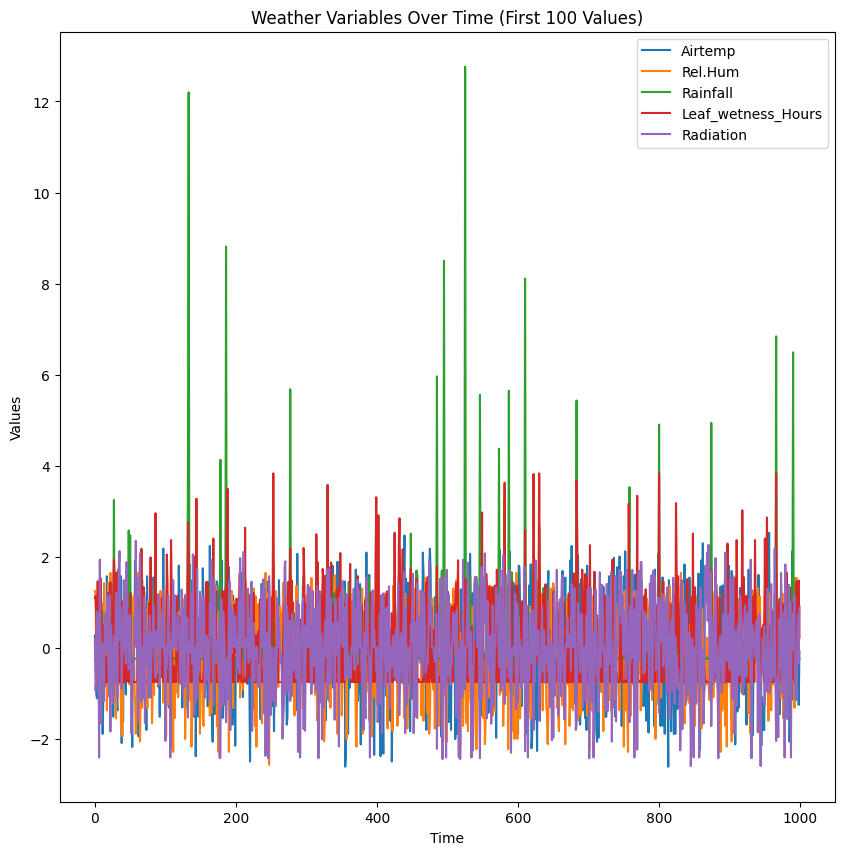

In [43]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 10))

# Assuming X_train_scaled is a NumPy array after scaling

plt.plot(X_train_scaled[:1000, 0], label='Airtemp')
plt.plot(X_train_scaled[:1000, 1], label='Rel.Hum')
plt.plot(X_train_scaled[:1000, 2], label='Rainfall')
plt.plot(X_train_scaled[:1000, 3], label='Leaf_wetness_Hours')
plt.plot(X_train_scaled[:1000, 4], label='Radiation')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Weather Variables Over Time (First 100 Values)')
plt.legend()
plt.show()


In [44]:

model = SVC(kernel='linear')

# Fit the model to the training data
model.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [47]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# print(predictions)

In [49]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9474431818181818


In [48]:
# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9474431818181818


In [51]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[647  10]
 [ 27  20]]


In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)


Precision: 0.9403612815843899
Recall: 0.9474431818181818
F1-score: 0.9419770922165736
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       657
           1       0.67      0.43      0.52        47

    accuracy                           0.95       704
   macro avg       0.81      0.71      0.75       704
weighted avg       0.94      0.95      0.94       704

